Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke..
import scipy
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plt2d(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50);


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Točnost mog modela iznosi 1.0
Tezine iznose :  [array([2.1]), array([-0.5, -0.1])]


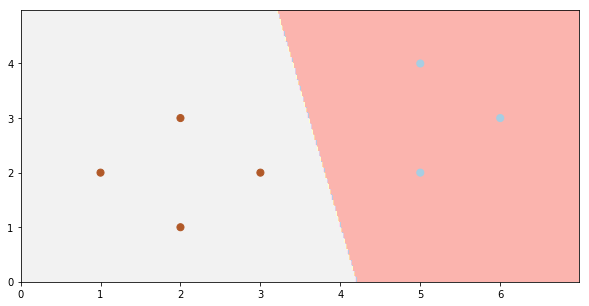

In [31]:
# Vaš kôd ovdje...
rc1a = RidgeClassifier(alpha=0).fit(seven_X, seven_y)
#za klas preko reg
h1a = lambda x : rc1a.predict(x) > 0.5
w1a=[]
w1a.insert(0, rc1a.intercept_)
for i in range (0, len(rc1a.coef_)):
    w1a.insert(i+1, rc1a.coef_[i])
pom=accuracy_score(seven_y, rc1a.predict(seven_X))
print('Točnost mog modela iznosi', pom)
print('Tezine iznose : ', w1a)
plt2d(seven_X, seven_y, h1a)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

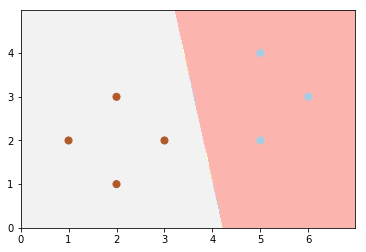

In [6]:
# Vaš kôd ovdje...
rc1b = LinearRegression().fit(seven_X, seven_y)
h1b = lambda x : rc1b.predict(x) >= 0.5

plt2d(seven_X, seven_y, h1b)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Točnost mog modela iznosi 0.87500
Tezine iznose :  [array([0.84938704]), array([-0.4028021 ,  0.30823117])]


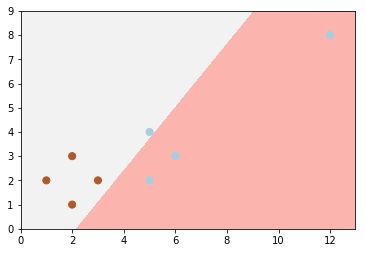

In [8]:
# Vaš kôd ovdje...
rc1c = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)
#za klas preko reg
h1c = lambda x : rc1c.predict(x) > 0
w1c=[]
w1c.append(rc1c.intercept_)
for i in range (0, len(rc1c.coef_)):
    w1c.append(rc1c.coef_[i])
pom=accuracy_score(outlier_y, rc1c.predict(outlier_X))
print('Točnost mog modela iznosi %.5f'%pom)
print('Tezine iznose : ', w1c)
plt2d(outlier_X, outlier_y, h1c)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Točnost mog modela iznosi 0.87500
Tezine iznose :  [array([1.50505051]), array([-0.4040404 , -0.08080808])]


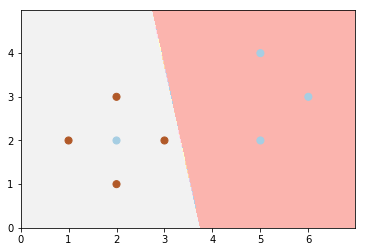

In [10]:
# Vaš kôd ovdje...
rc1d = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)
#za klas preko reg
h1d = lambda x : rc1d.predict(x) > 0
w1d=[]
w1d.append(rc1d.intercept_)
for i in range (0, len(rc1d.coef_)):
    w1d.append(rc1d.coef_[i])
pom=accuracy_score(unsep_y, rc1d.predict(unsep_X))
print('Točnost mog modela iznosi %.5f'%pom)
print('Tezine iznose : ', w1d)
plt2d(unsep_X, unsep_y, h1d)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

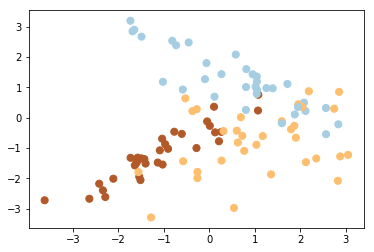

In [11]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...
X2a, y2a = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plt2d(X2a, y2a)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

<function <lambda> at 0x000002544B7E87B8>


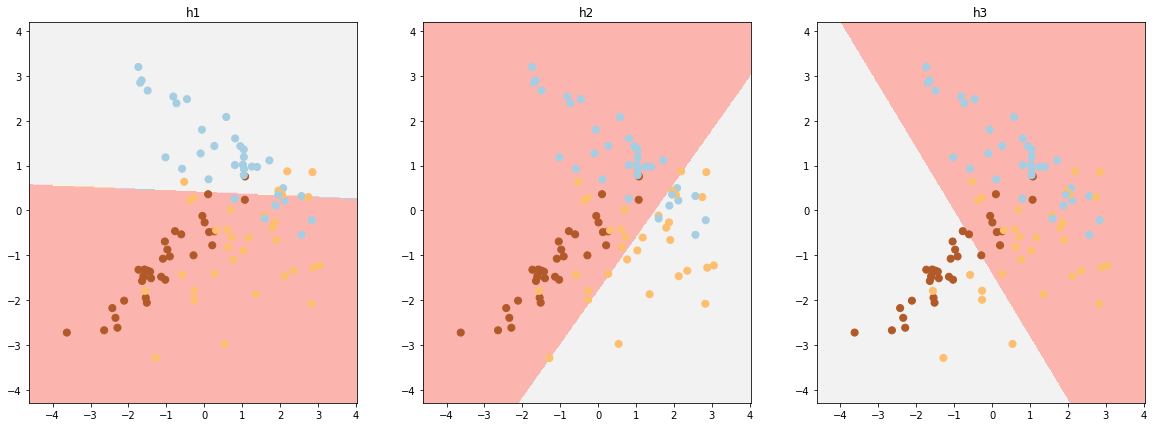

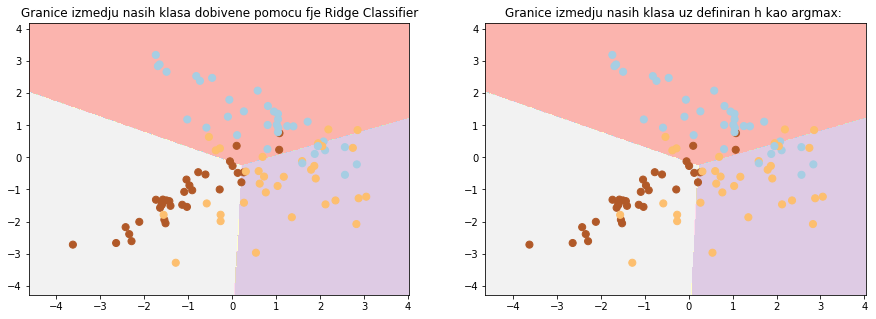

In [12]:
# Vaš kôd ovdje...

def predict2(x):
    #x = x.reshape(1,-1)
    p = [lr21.predict(x), lr22.predict(x), lr23.predict(x)]
    return np.argmax(p)


y21=[]
y22=[]
y23=[]
for i in y2a:
    if i == 0:
        y21.append(1)
        y22.append(-1)
        y23.append(-1)
    elif i==1:
        y21.append(-1)
        y22.append(1)
        y23.append(-1)
    elif i==2:
        y21.append(-1)
        y22.append(-1)
        y23.append(1)

lr21=LinearRegression().fit(X2a, y21)
lr22=LinearRegression().fit(X2a, y22)
lr23=LinearRegression().fit(X2a, y23)

h21= lambda x : lr21.predict(x) >= 0
h22= lambda x : lr22.predict(x) >= 0
h23= lambda x : lr23.predict(x) >= 0
#----
plt.figure(figsize=(20,7))

subplot(1,3,1)
plt2d(X2a, y2a, h21)
plt.title('h1')

subplot(1,3,2)
plt2d(X2a, y2a, h22)
plt.title('h2')

subplot(1,3,3)
plt2d(X2a, y2a, h23)
plt.title('h3')

#---Zajednicke granice izmedju klasa uz definiranu fju h argmax
argmax = lambda x : np.argmax([lr21.predict(x.reshape(-1, 2)), lr22.predict(x.reshape(-1, 2)), lr23.predict(x.reshape(-1, 2))], axis = 0)
arg = lambda x :np.argmax(lr21.predict(x), lr22.predict(x), lr23.predict(x))
plt.figure(figsize=(15,5))
subplot(1,2,2)
plt.title('Granice izmedju nasih klasa uz definiran h kao argmax: ')
#print(argmax)
plt2d(X2a, y2a, argmax)

#---pomocu RidgeClassifiera
rc2b = RidgeClassifier(alpha=0).fit(X2a, y2a)
h2r = lambda x : rc2b.predict(x)
print(h2r)
subplot(1,2,1)
plt.title('Granice izmedju nasih klasa dobivene pomocu fje Ridge Classifier')
plt2d(X2a, y2a, h2r)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

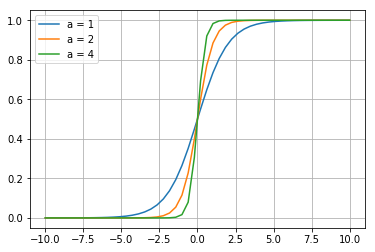

In [13]:
# Vaš kôd ovdje...
def sigm(x): return 1/(1+exp(-x))

a=[1,2,4]
pom = np.linspace(-10,10)
plt.figure()
for i in a:
    plt.plot(pom, sigm(pom*i))
grid()
legend(['a = 1', 'a = 2', 'a = 4'])

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
# Vaš kôd ovdje...

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss

def lr_h(x, w):
    fi = PolynomialFeatures(1).fit_transform(x.reshape(1, -1))
    return sigm(fi.dot(w))

def cross_entropy_loss(h, y):
    return -y*np.log(h) - (1-y)*np.log(1-h)

def cross_entropy_error(X, y, w):
    fi = PolynomialFeatures(1).fit_transform(X)
    return log_loss(y, sigm(fi.dot(w)))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    N=len(X)
    
    w_uk = zeros(shape(X)[1] + 1)
    w_trace = []
    err_in = epsilon**-1
    
    for i in range (0, max_iter):
        err=0
        derw0=0
        derw=zeros(shape(X)[1])
        for j in range (0, len(X)):
            derw0 += lr_h(X[j], w_uk) - y[j]
            derw += (lr_h(X[j], w_uk) - y[j])*X[j]
            err+= cross_entropy_loss(lr_h(X[j], w_uk), y[j])
        
        if abs(err_in - err)<epsilon:
            print ('Greska je manja od epsilona za itreraciju i = ', i)
            break
            
        else: err_in = err
        
        w_uk[0] -= eta*derw0
        w_uk[1:] = w_uk[1:] * (1-eta*alpha) - eta*derw
        w_trace.extend(w_uk)
        
    if trace:
        return w_uk, w_trace
    else:
        return w_uk
        

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [30]:
# Vaš kôd ovdje...
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
w3c = lr_train(seven_X, seven_y)
h3c = lambda x: lr_h((x.reshape(-1, 2), w3c) > 0.5
E3c = cross_entropy_error(seven_X, seven_y, w3c)
print('Iznos pogreske unakrsne entropije je -> ', E3c)
print(w3c)
print(h3c)

plt.figure()
plt2d(seven_X, seven_y, h3c)


SyntaxError: invalid syntax (<ipython-input-30-dc17765e1b99>, line 4)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

[ 6.44150959 -2.11012128  0.53522851]
Greska je manja od epsilona za itreraciju i =  1544
Greska je manja od epsilona za itreraciju i =  1128


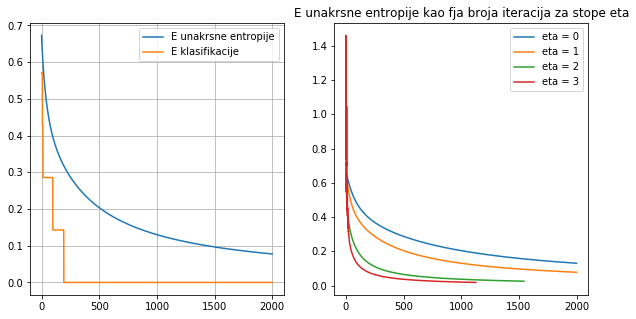

In [16]:
# Vaš kôd ovdje...
from sklearn.metrics import zero_one_loss as ZO
eta = [0.005,0.01,0.05,0.1]
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
w3d, w3d_trace = lr_train(seven_X, seven_y, trace=True)
print(w3d)

fi=PolynomialFeatures(1).fit_transform(seven_X)
h3d = lambda x : x>=0.5

E_uk = []
E_log=[]
E_class=[]

#po svakoj trojci iz tracea
for i in range(0, len(w3d_trace), 3):
    E_log.append(cross_entropy_error(seven_X, seven_y, w3d_trace[i:i+3]))
    E_class.append(ZO(seven_y, h3d(sigm(fi.dot(w3d_trace[i:i+3])))))
    
for j in range (0, len(eta)):
    w3da, w3da_trace = lr_train(seven_X, seven_y, eta[j], trace=True)
    E_pom = []
    for k in range(0, len(w3da_trace), 3):
        E_pom.append(cross_entropy_error(seven_X, seven_y, w3da_trace[k:k+3]))
    E_uk.append(E_pom)
plt.figure(figsize(10,5))
plt.subplot(1,2,1)
plt.plot(E_log)
plt.plot(E_class)
plt.grid()
plt.legend(['E unakrsne entropije', 'E klasifikacije'])

plt.subplot(1,2,2)
plt.grid
plt.title('E unakrsne entropije kao fja broja iteracija za stope eta')
for i in range (0, len(eta)):
    plt.plot(E_uk[i], label='eta = '+ str(i))
plt.legend()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

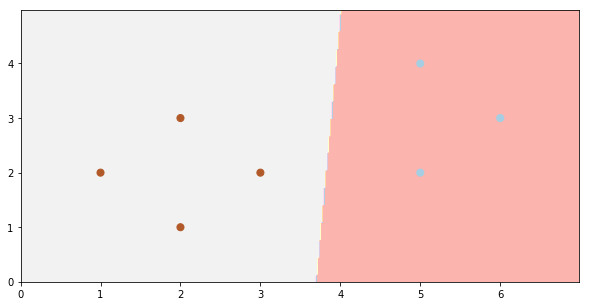

In [17]:
from sklearn.linear_model import LogisticRegression as LR

# Vaš kôd ovdje...
log3e = LR(max_iter=2000, tol=0.0001, C=1/0.001).fit(seven_X, seven_y)
h3e = lambda x : log3e.predict(x)

plt2d(seven_X, seven_y, h3e)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

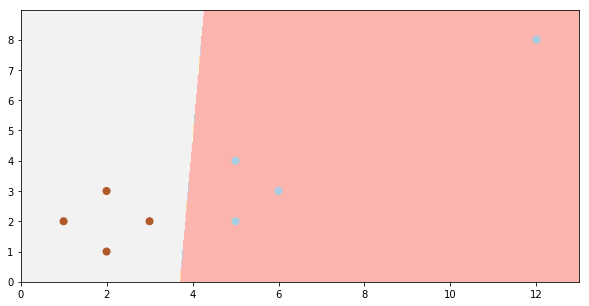

In [18]:
# Vaš kôd ovdje...
log4a = LR(max_iter=2000, tol=0.0001, C=1/0.001).fit(outlier_X, outlier_y)
h4a = lambda x : log4a.predict(x)

plt2d(outlier_X, outlier_y, h4a)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


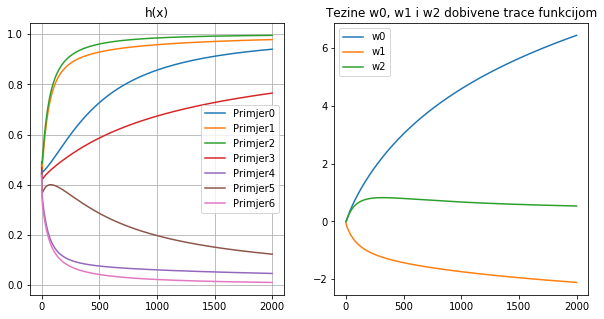

In [19]:
# Vaš kôd ovdje...
w4b, w4b_trace = lr_train(seven_X, seven_y, trace = True)
h_uk = []
wa =[]
wb =[]
wc =[]
#za pojedinacne
for i in range(0, len(w4b_trace), 3):
    wa.append(w4b_trace[i])
    wb.append(w4b_trace[i+1])
    wc.append(w4b_trace[i+2])
    
for j in range(0, len(seven_X)):
    hpom=[]
    for k in range(0, len(w4b_trace), 3):
        hpom.append(lr_h(seven_X[j], w4b_trace[k:k+3]))
    h_uk.append(hpom)
    
plt.figure(figsize(10,5))
plt.subplot(1,2,1)
plt.title('h(x)')
plt.grid()
for i in range(0, len(h_uk)):
    plt.plot(h_uk[i], label='Primjer' + str(i))
plt.legend()
    
plt.subplot(1,2,2)
plt.title('Tezine w0, w1 i w2 dobivene trace funkcijom')
plt.plot(wa)
plt.plot(wb)
plt.plot(wc)
plt.grid
plt.legend(['w0', 'w1', 'w2'])


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Greska je manja od epsilona za itreraciju i =  1315


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

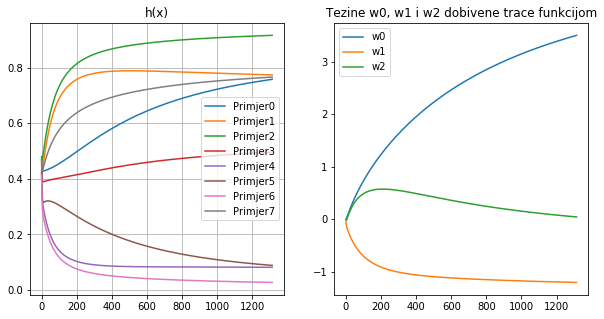

In [20]:
# Vaš kôd ovdje...
unsep_y = np.append(seven_y, 0)
w4c, w4c_trace = lr_train(unsep_X, unsep_y, trace = True)
h_uk = []
wa =[]
wb =[]
wc =[]
#za pojedinacne
for i in range(0, len(w4c_trace), 3):
    wa.append(w4c_trace[i])
    wb.append(w4c_trace[i+1])
    wc.append(w4c_trace[i+2])
    
for j in range(0, len(unsep_X)):
    hpom=[]
    for k in range(0, len(w4c_trace), 3):
        hpom.append(lr_h(unsep_X[j], w4c_trace[k:k+3]))
    h_uk.append(hpom)
    
plt.figure(figsize(10,5))
plt.subplot(1,2,1)
plt.title('h(x)')
plt.grid()
for i in range(0, len(h_uk)):
    plt.plot(h_uk[i], label='Primjer'+ str(i))
plt.legend()    
    
plt.subplot(1,2,2)
plt.title('Tezine w0, w1 i w2 dobivene trace funkcijom')
plt.plot(wa)
plt.plot(wb)
plt.plot(wc)
plt.legend(['w0', 'w1', 'w2'])
plt.grid

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [21]:
from numpy.linalg import norm

Greska je manja od epsilona za itreraciju i =  772
Greska je manja od epsilona za itreraciju i =  230


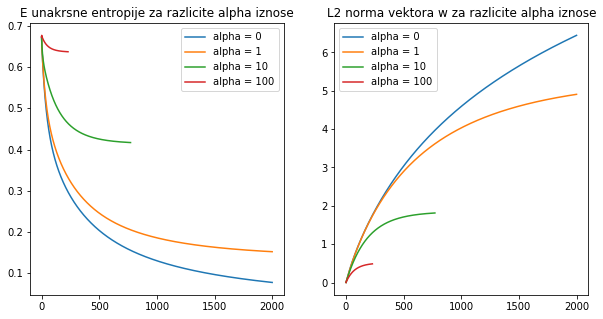

In [22]:
# Vaš kôd ovdje...
a=[0,1,10,100]
#todo kako w? -----normala na ravninu
Euk=[]
l2uk=[]
for i in a:
    w5, w5t = lr_train(seven_X, seven_y, alpha=i, trace=True)
    Epom=[]
    l2pom=[]
    
    for j in range(0, len(w5t), 3):
        Epom.append(cross_entropy_error(seven_X, seven_y, w5t[j:j+3]))
        l2pom.append(linalg.norm(w5t[j:j+1]))
    Euk.append(Epom)
    l2uk.append(l2pom)
    
plt.subplot(1,2,1)
plt.grid
plt.title('E unakrsne entropije za razlicite alpha iznose')
for i in range (0, len(Euk)):
    plt.plot(Euk[i], label='alpha = '+ str(a[i]))
plt.legend()

plt.subplot(1,2,2)
plt.grid
plt.title('L2 norma vektora w za razlicite alpha iznose')
for i in range (0, len(Euk)):
    plt.plot(l2uk[i], label='alpha = '+ str(a[i]))
plt.legend()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [23]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as Log
#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

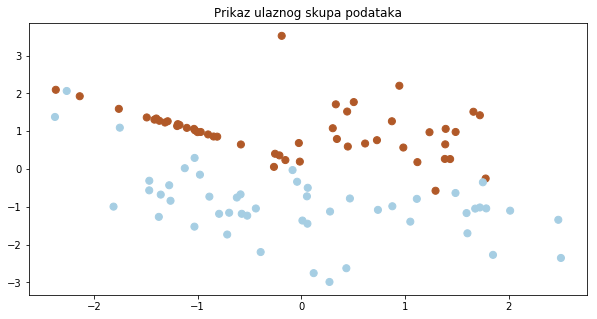

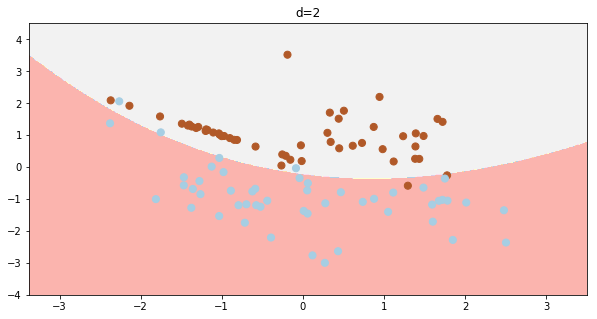

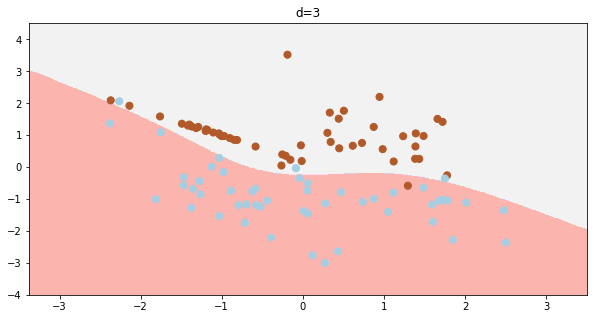

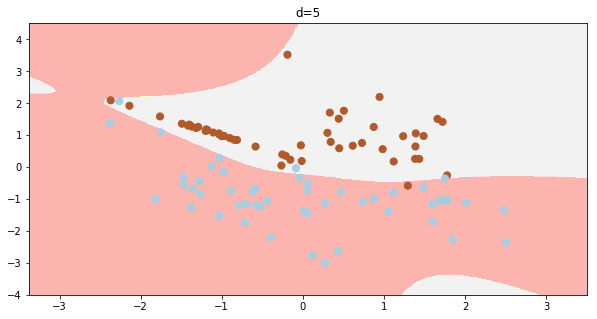

In [33]:
# Vaš kôd ovdje...
x6a, y6a = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
d=[2, 3, 5]

plt.title('Prikaz ulaznog skupa podataka')
plt2d(x6a, y6a)

ply1=PF(d[0])
model1=ply1.fit_transform(x6a)
log1=Log().fit(model1, y6a)
h6a = lambda x :log1.predict(ply1.transform(x))
plt.figure()
plt.title('d=2')
plt2d(x6a, y6a, h6a)

ply1=PF(d[1])
model1=ply1.fit_transform(x6a)
log1=Log().fit(model1, y6a)
h6a = lambda x :log1.predict(ply1.transform(x))
plt.figure()
plt.title('d=3')
plt2d(x6a, y6a, h6a) 

ply1=PF(d[2])
model1=ply1.fit_transform(x6a)
log1=Log().fit(model1, y6a)
h6a = lambda x :log1.predict(ply1.transform(x))
plt.figure()
plt.title('d=5')
plt2d(x6a, y6a, h6a) 
    



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?